In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('spam.csv', encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df = df[['v1', 'v2']]

df.columns = ['label', 'message']

In [4]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df.isnull().sum()

label      0
message    0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(403)

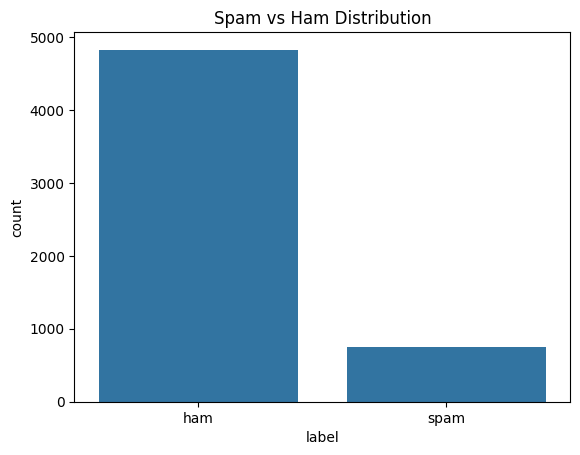

In [7]:
sns.countplot(x=df["label"])
plt.title("Spam vs Ham Distribution")
plt.show()

In [8]:
df["label"] = df["label"].map({"ham":0, "spam":1})

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words="english")
x = tfidf.fit_transform(df["message"])
y = df["label"]

In [10]:
from sklearn.model_selection import train_test_split

x_train,  x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True)

In [11]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=2000)
lr.fit(x_train, y_train)

y_pred_lr = lr.predict(x_test)

In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

acc_lr = accuracy_score(y_test, y_pred_lr)
cm_lr = confusion_matrix(y_test, y_pred_lr)
cr_lr = classification_report(y_test, y_pred_lr)

print(acc_lr)
print(cm_lr)
print(cr_lr)

0.9443946188340807
[[962   3]
 [ 59  91]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       965
           1       0.97      0.61      0.75       150

    accuracy                           0.94      1115
   macro avg       0.96      0.80      0.86      1115
weighted avg       0.95      0.94      0.94      1115



In [13]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()

nb.fit(x_train, y_train)
y_pred_nb = nb.predict(x_test)

In [14]:
acc_nb = accuracy_score(y_test, y_pred_nb)
cm_nb = confusion_matrix(y_test, y_pred_nb)
cr_nb = classification_report(y_test, y_pred_nb)

print(acc_nb)
print(cm_nb)
print(cr_nb)

0.968609865470852
[[965   0]
 [ 35 115]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.77      0.87       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.93      1115
weighted avg       0.97      0.97      0.97      1115



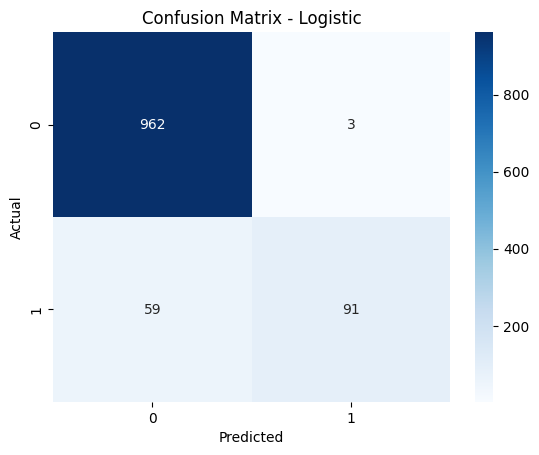

In [17]:
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()